# **Name- Mousoomi Shit**

#**CAPABL DATA SCIENCE PROJECT**
# **Prediction of Taxi Trip Duration**
**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

**Reading the data**

In [4]:
raw_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
raw_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
raw_df.shape

(1458644, 11)

In [8]:
raw_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
raw_df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,1450599
Y,8045


In [10]:
raw_df['passenger_count'].value_counts()

,count
passenger_count,
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1


In [11]:
raw_df.dtypes[raw_df.dtypes=='object']

,0
id,object
pickup_datetime,object
dropoff_datetime,object
store_and_fwd_flag,object


**Checking for missing values**

In [12]:
raw_df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [13]:
raw_df.duplicated().sum()

np.int64(0)

In [14]:
raw_df[raw_df['passenger_count']==0].count()

,0
id,60
vendor_id,60
pickup_datetime,60
dropoff_datetime,60
passenger_count,60
pickup_longitude,60
pickup_latitude,60
dropoff_longitude,60
dropoff_latitude,60
store_and_fwd_flag,60


In [15]:
raw_df=raw_df[raw_df['passenger_count']!=0]
test_df=test_df[test_df['passenger_count']!=0]

In [16]:
la1 = raw_df['pickup_latitude'].mean()
la2 = raw_df['dropoff_latitude'].mean()
print("Average Lattitude", (la1+la2)/2)

Average Lattitude 40.751360835787814


In [17]:
lo1 = raw_df['pickup_longitude'].mean()
lo2 = raw_df['dropoff_longitude'].mean()
print("Average Longitude", (lo1+lo2)/2)

Average Longitude -73.97345166289449


Coordinates of (40.7514, -73.9734) correspond to that of NYC

# **Feature Engineering**

Creating a distance attribute

In [18]:
import geopy.distance
def dis_find(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geopy.distance.geodesic(coords_1, coords_2).km
raw_df['dis'] = raw_df.apply(lambda row: dis_find(row), axis=1)

In [19]:
test_df['dis'] = test_df.apply(lambda row: dis_find(row), axis=1)

In [20]:
raw_df['dis']

,dis
0,1.502172
1,1.808660
2,6.379687
3,1.483632
4,1.187038
...,...
1458639,1.227090
1458640,6.046212
1458641,7.821532
1458642,1.092524


In [21]:
raw_df[raw_df['dis']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,1284,0.0
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,127,0.0
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,566,0.0
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,632,0.0


In [22]:
raw_df=raw_df[raw_df['dis']!=0]
test_df=test_df[test_df['dis']!=0]

In [23]:
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'dis'],
      dtype='object')

In [24]:
raw_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dis'],
      dtype='object')

In [25]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745


In [26]:
raw_df['pickup_datetime']=pd.to_datetime(raw_df['pickup_datetime'])
raw_df['dropoff_datetime']=pd.to_datetime(raw_df['dropoff_datetime'])

In [27]:
test_df['pickup_datetime']=pd.to_datetime(test_df['pickup_datetime'])

In [28]:
raw_df['month'] = raw_df['pickup_datetime'].dt.month_name()
test_df['month'] = test_df['pickup_datetime'].dt.month_name()

In [29]:
raw_df['pickup_day']=raw_df['pickup_datetime'].dt.day_name()
test_df['pickup_day']=test_df['pickup_datetime'].dt.day_name()

In [30]:
raw_df['pickup_hour'] = raw_df['pickup_datetime'].dt.hour
raw_df['pickup_min'] = raw_df['pickup_datetime'].dt.minute

In [31]:
test_df['pickup_hour'] = test_df['pickup_datetime'].dt.hour
test_df['pickup_min'] = test_df['pickup_datetime'].dt.minute

In [32]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863,June,Thursday,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774,June,Thursday,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112,June,Thursday,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978,June,Thursday,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745,June,Thursday,23,59


In [33]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis,month,pickup_day,pickup_hour,pickup_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,March,Monday,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,June,Sunday,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,January,Tuesday,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,April,Wednesday,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,March,Saturday,13,30


In [34]:
raw_df['pickup_day'].value_counts()

,count
pickup_day,
Friday,222605
Saturday,219994
Thursday,217649
Wednesday,209293
Tuesday,201928
Sunday,194553
Monday,186673


In [35]:
raw_df['month'].value_counts()

,count
month,
March,255204
April,250638
May,247502
February,237336
June,233296
January,228719


In [36]:
raw_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dis', 'month', 'pickup_day', 'pickup_hour',
       'pickup_min'],
      dtype='object')

# **Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

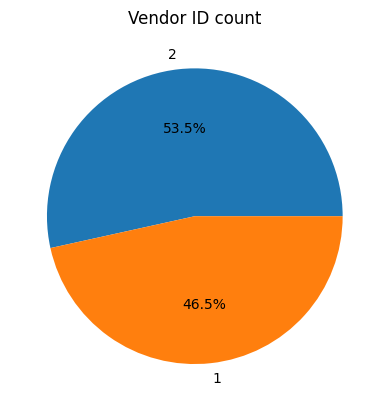

In [37]:
plt.pie(raw_df['vendor_id'].value_counts(), labels = raw_df['vendor_id'].value_counts().index, autopct='%1.1f%%')
plt.title('Vendor ID count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

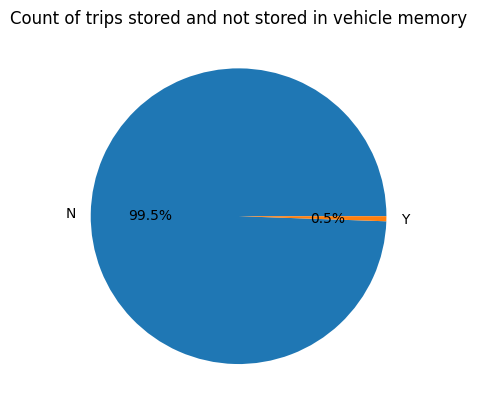

In [38]:
plt.pie(raw_df['store_and_fwd_flag'].value_counts(), labels = raw_df['store_and_fwd_flag'].value_counts().index, autopct='%1.1f%%')
plt.title('Count of trips stored and not stored in vehicle memory')
plt.show

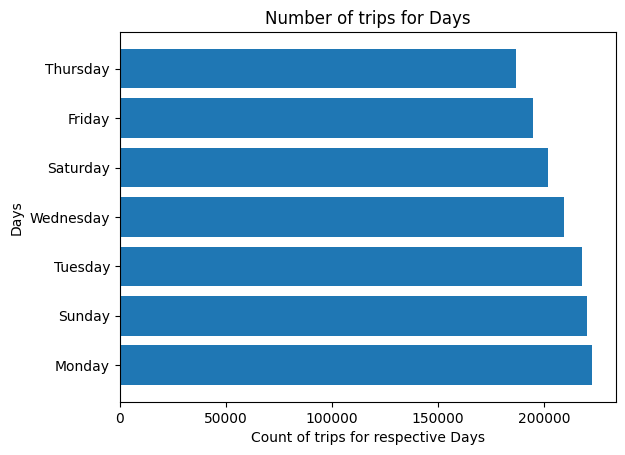

In [39]:
plt.barh(raw_df['pickup_day'].unique(),raw_df['pickup_day'].value_counts())
plt.xlabel('Count of trips for respective Days')
plt.ylabel('Days')
plt.title('Number of trips for Days')
plt.show()

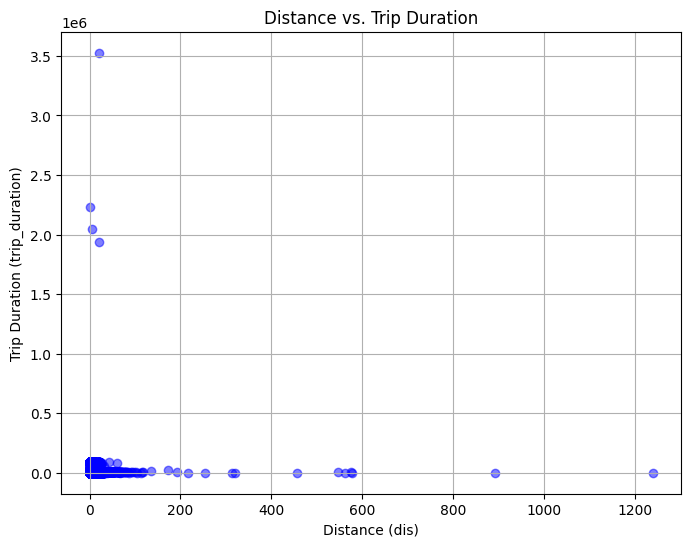

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(raw_df['dis'], raw_df['trip_duration'], alpha=0.5, color='b')
plt.xlabel('Distance (dis)')
plt.ylabel('Trip Duration (trip_duration)')
plt.title('Distance vs. Trip Duration')
plt.grid(True)
plt.show()

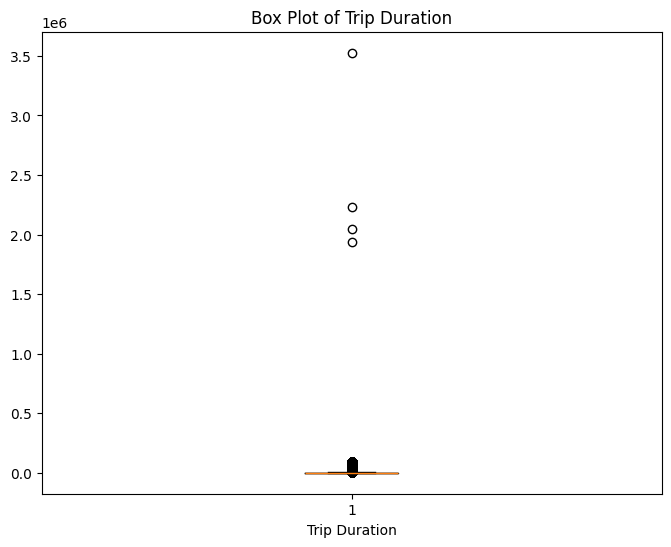

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(raw_df['trip_duration'])
plt.xlabel('Trip Duration')
plt.title('Box Plot of Trip Duration')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

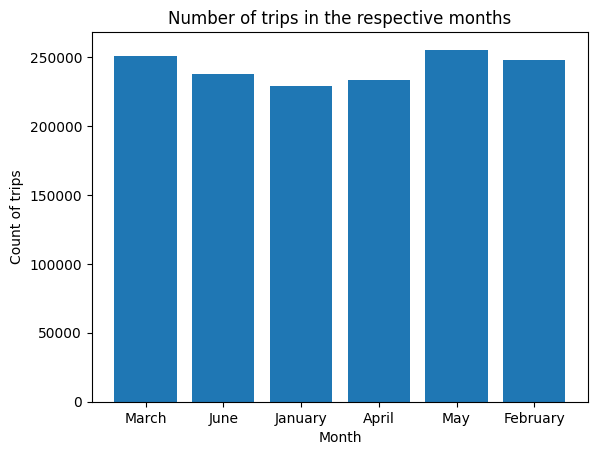

In [42]:
plt.bar(raw_df['month'].unique(), raw_df['month'].value_counts().sort_index())
plt.xlabel('Month')
plt.ylabel('Count of trips')
plt.title('Number of trips in the respective months')
plt.show

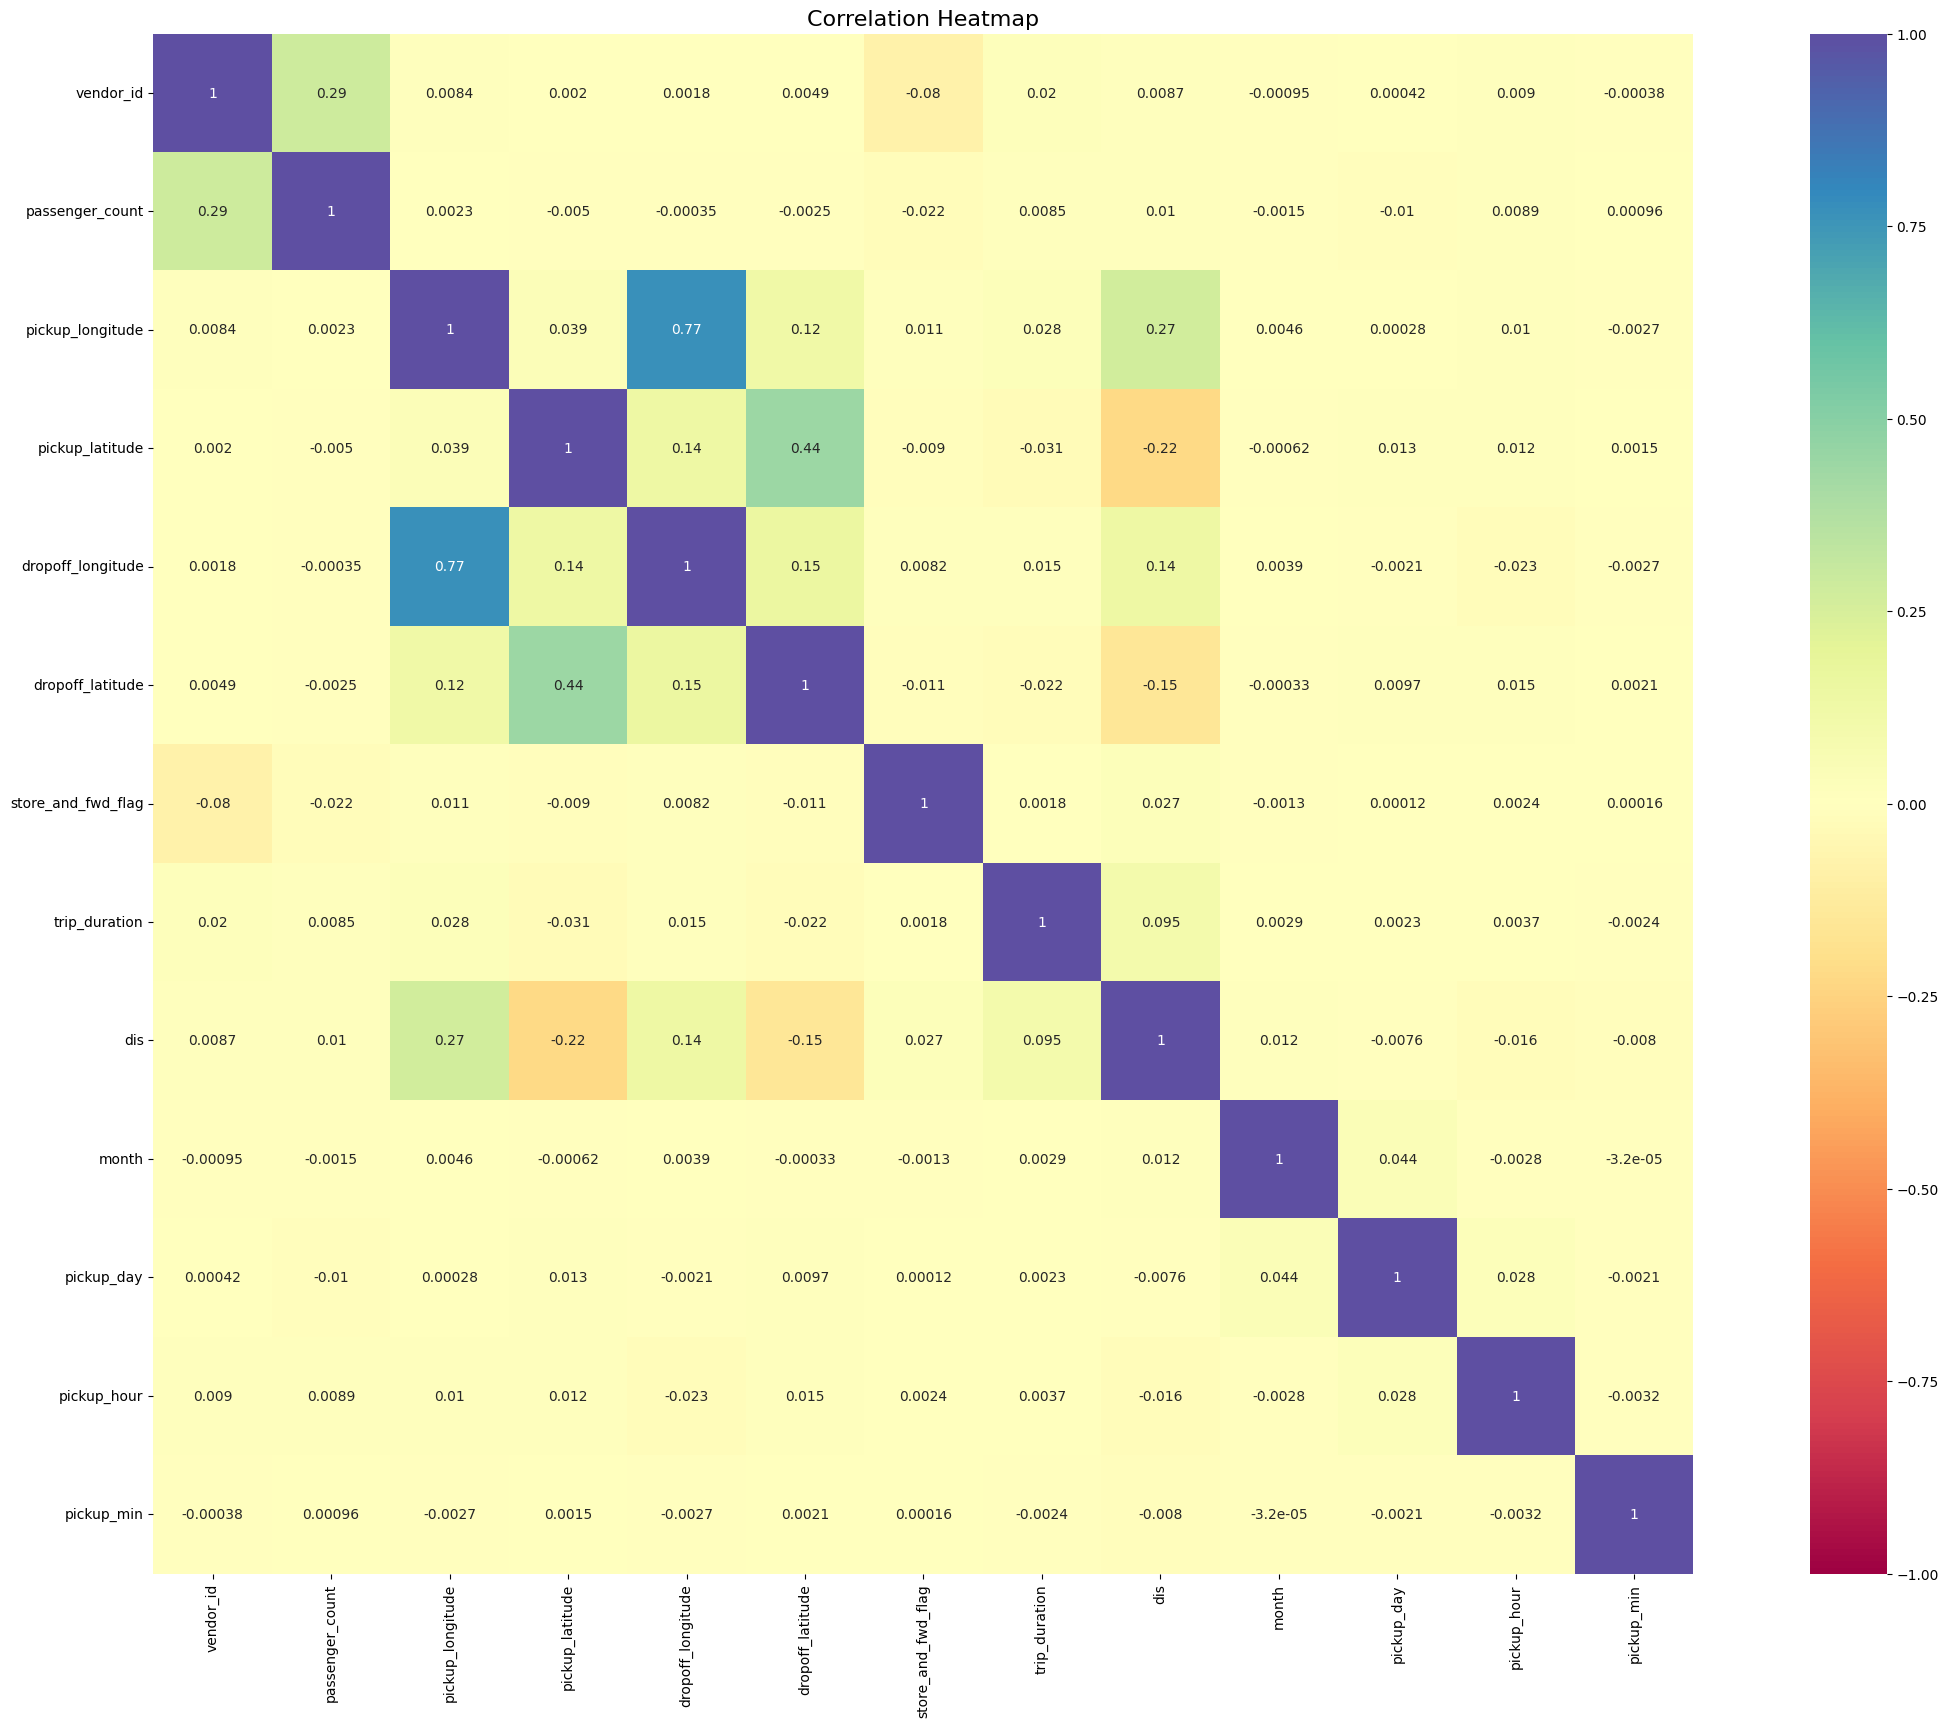

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

plt.figure (figsize= (30,20))

# Create a copy of the DataFrame to work with for correlation
df_for_corr = raw_df.copy()

# Drop columns that are identifiers or datetime objects and not directly suitable for numerical correlation
df_for_corr = df_for_corr.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime'])

# Encode categorical string columns into numerical representations
# Note: 'le' (LabelEncoder) was planned for use in later cells, but to fix this cell independently,
# we re-instantiate it here.
le = LabelEncoder()
df_for_corr['store_and_fwd_flag'] = le.fit_transform(df_for_corr['store_and_fwd_flag'])
df_for_corr['month'] = le.fit_transform(df_for_corr['month'])
df_for_corr['pickup_day'] = le.fit_transform(df_for_corr['pickup_day'])

sns.heatmap(df_for_corr.corr(numeric_only=True), cmap='Spectral', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# **Data Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
raw_df['month'] = le.fit_transform(raw_df['month'])
raw_df['pickup_day'] = le.fit_transform(raw_df['pickup_day'])

In [47]:
test_df['month'] = le.fit_transform(test_df['month'])
test_df['pickup_day'] = le.fit_transform(test_df['pickup_day'])

In [48]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863,3,4,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774,3,4,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112,3,4,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978,3,4,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745,3,4,23,59


In [56]:
raw_df['store_and_fwd_flag'] = le.fit_transform(raw_df['store_and_fwd_flag'])
test_df['store_and_fwd_flag'] = le.fit_transform(test_df['store_and_fwd_flag'])

In [57]:
X = raw_df.drop(columns = ['id','pickup_datetime','dropoff_datetime','trip_duration'])
y = raw_df['trip_duration']

In [51]:
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,1.502172,4,1,17,24
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,1.808660,3,3,0,43
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,6.379687,2,5,11,35
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,1.483632,0,6,19,32
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,1.187038,4,2,13,30


In [52]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis,month,pickup_day,pickup_hour,pickup_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,4,1,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,3,3,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,2,5,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,0,6,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,4,2,13,30


# **Data Splitting**

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size = 0.8,random_state = 2529)

In [54]:
X_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
1303900,2,2,-73.992020,40.738182,-73.985275,40.741905,N,0.703888,3,4,16,38
1177778,2,1,-73.975800,40.776421,-73.956596,40.781277,N,1.708397,5,5,13,3
544081,2,1,-74.011696,40.702831,-73.955437,40.774319,N,9.252193,0,4,18,17
727066,2,1,-73.990479,40.755917,-73.994728,40.761810,N,0.746408,4,0,0,6
1219599,1,1,-73.978386,40.750877,-73.946587,40.773991,N,3.714480,0,6,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1444323,2,1,-73.863724,40.769718,-73.954811,40.767368,N,7.694822,1,2,17,23
154616,1,1,-73.987129,40.759361,-73.990517,40.750633,Y,1.010572,3,4,0,12
1154509,2,1,-73.968437,40.754875,-73.976028,40.744583,N,1.310451,5,0,16,49
600033,1,1,-74.000137,40.727119,-73.986519,40.740082,N,1.842668,2,3,1,44


# **Model Training**
**Linear Regression**

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [60]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1.502172,4,1,17,24
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1.808660,3,3,0,43
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,6.379687,2,5,11,35
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1.483632,0,6,19,32
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,1.187038,4,2,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,1.227090,0,0,13,31
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6.046212,2,3,7,35
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,7.821532,0,0,6,57
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1.092524,2,5,15,56


In [61]:
test_df = test_df.drop(columns=['id','pickup_datetime'])

In [62]:
test_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,1,1,-73.988129,40.732029,-73.990173,40.756680,0,2.742863,3,4,23,59
1,1,1,-73.964203,40.679993,-73.959808,40.655403,0,2.755774,3,4,23,59
2,1,1,-73.997437,40.737583,-73.986160,40.729523,0,1.307112,3,4,23,59
3,2,1,-73.956070,40.771900,-73.986427,40.730469,0,5.266978,3,4,23,59
4,1,1,-73.970215,40.761475,-73.961510,40.755890,0,0.961745,3,4,23,59


**Model Evalutation and Accuracy**

In [63]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.028978630005172423

In [64]:
mean_absolute_percentage_error(y_test, y_pred)

0.9545976009449485

In [65]:
test_df.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [66]:
len(test_df.columns)==len(X.columns)

True

In [67]:
y_pred1 = lr.predict(test_df)

In [68]:
y_pred1

array([ 830.35210846, 1009.31152283,  682.13808847, ..., 1335.40124566,
       2616.31764769, 1321.93187457])

**Lasso and Ridge Regression**

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.028979178276226425

In [71]:
y_pred1 = lasso.predict(test_df)
y_pred1

array([ 830.34628678, 1009.18308873,  682.11510369, ..., 1335.39938681,
       2616.41784102, 1321.92291197])

In [72]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.028978630651722903

In [74]:
y_pred1 = ridge.predict(test_df)
y_pred1

array([ 830.3520707 , 1009.31140324,  682.13806172, ..., 1335.40124453,
       2616.31758049, 1321.93180993])

In [75]:
import joblib
from google.colab import files

# 1. Save your best model (replace 'ridge' if you want to use a different one)
joblib.dump(ridge, 'taxi_model.pkl')

# 2. Save your LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

# 3. Download them to your computer
files.download('taxi_model.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>